# Introduction

In this lab, we will explore semi-supervised classifiers on the Iris dataset. We will compare the decision boundaries generated by Label Spreading, Self-training, and Support Vector Machine (SVM) on the Iris dataset. We will use scikit-learn, a popular Python machine learning library, to implement the classifiers and visualize the decision boundaries.



# Load the Iris dataset and split the data

We will load the Iris dataset, which is a widely used dataset in machine learning for classification tasks. The dataset contains 150 samples of Iris flowers, with four features for each sample: sepal length, sepal width, petal length, and petal width. We will split the dataset into input features and target labels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

# Split the dataset into input features and target labels
X = iris.data[:, :2] # We will only use the first two features for visualization purposes
y = iris.target

# Set up the Label Spreading classifiers

We will set up three Label Spreading classifiers with different percentages of labeled data: 30%, 50%, and 100%. Label Spreading is a semi-supervised learning algorithm that propagates labels from labeled to unlabeled data points based on the similarity between them.

In [2]:
from sklearn.semi_supervised import LabelSpreading

# Set up the Label Spreading classifiers
rng = np.random.RandomState(0)
y_rand = rng.rand(y.shape[0])
y_30 = np.copy(y)
y_30[y_rand < 0.3] = -1  # set random samples to be unlabeled
y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1
ls30 = (LabelSpreading().fit(X, y_30), y_30, "Label Spreading 30% data")
ls50 = (LabelSpreading().fit(X, y_50), y_50, "Label Spreading 50% data")
ls100 = (LabelSpreading().fit(X, y), y, "Label Spreading 100% data")

# Set up the Self-training classifiers

We will set up two Self-training classifiers with different percentages of labeled data: 30% and 50%. Self-training is a semi-supervised learning algorithm that trains a classifier on the labeled data and then uses it to predict the labels of the unlabeled data. The most confident predictions are added to the labeled data and the process is repeated until convergence.

In [3]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC

# Set up the Self-training classifiers
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True)
st30 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_30),
    y_30,
    "Self-training 30% data",
)
st50 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_50),
    y_50,
    "Self-training 50% data",
)

# Set up the SVM classifier

We will set up an SVM classifier with a radial basis function (RBF) kernel. SVM is a supervised learning algorithm that finds the optimal hyperplane that separates the data into different classes.

In [4]:
from sklearn.svm import SVC

# Set up the SVM classifier
rbf_svc = (SVC(kernel="rbf", gamma=0.5).fit(X, y), y, "SVC with rbf kernel")

# Visualize the decision boundaries

We will create a mesh grid of points that covers the input feature space and use each classifier to predict the labels for the points in the mesh grid. We will then plot the decision boundaries and the labeled data points.

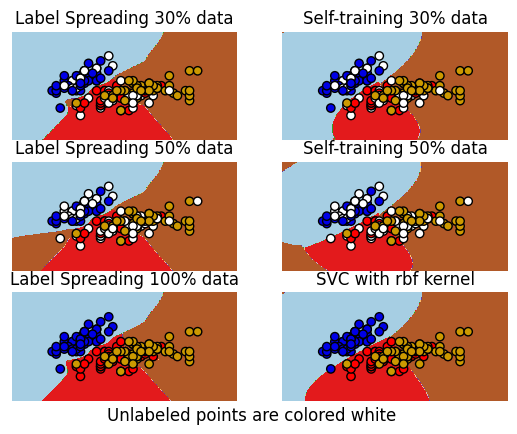

In [5]:
# Create a mesh grid to plot in
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Define a color map for the labels
color_map = {-1: (1, 1, 1), 0: (0, 0, 0.9), 1: (1, 0, 0), 2: (0.8, 0.6, 0)}

# Set up the classifiers
classifiers = (ls30, st30, ls50, st50, ls100, rbf_svc)

# Plot the decision boundaries and labeled data points for each classifier
for i, (clf, y_train, title) in enumerate(classifiers):
    # Plot the decision boundary
    plt.subplot(3, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("off")

    # Plot the labeled data points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors="black")

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

# Summary

In this lab, we explored semi-supervised classifiers on the Iris dataset. We compared the decision boundaries generated by Label Spreading, Self-training, and SVM on the Iris dataset. We used scikit-learn to implement the classifiers and visualize the decision boundaries. We found that Label Spreading and Self-training can learn good decision boundaries even when small amounts of labeled data are available.